In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("bank_customer_churn_data.csv")

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Data Pre-processing

In [4]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
#dropping unneeded columns that can't be used as features
df.drop(columns=["RowNumber", "Surname","Gender", "Surname"], inplace = True )

In [6]:
df

,CustomerId,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,619,France,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,42,3,75075.31,2,1,0,92888.52,1


In [7]:
df["Geography"].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [8]:
df["Geography"].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [9]:
#one hot encoding the geography categorical column to numerical column for ML
df = pd.get_dummies(df, columns=["Geography"])

In [10]:
df

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,15634602,619,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,15647311,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,15619304,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,15701354,699,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,15737888,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,39,5,0.00,2,1,0,96270.64,0,1,0,0
9996,15569892,516,35,10,57369.61,1,1,1,101699.77,0,1,0,0
9997,15584532,709,36,7,0.00,1,0,1,42085.58,1,1,0,0
9998,15682355,772,42,3,75075.31,2,1,0,92888.52,1,0,1,0


In [11]:
# creating new loyalty column from tenure and age
df["Loyalty"] = df["Tenure"]/df["Age"]

In [12]:
df

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Loyalty
0,15634602,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,0.047619
1,15647311,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,0.024390
2,15619304,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,0.190476
3,15701354,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,0.025641
4,15737888,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,0.046512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,39,5,0.00,2,1,0,96270.64,0,1,0,0,0.128205
9996,15569892,516,35,10,57369.61,1,1,1,101699.77,0,1,0,0,0.285714
9997,15584532,709,36,7,0.00,1,0,1,42085.58,1,1,0,0,0.194444
9998,15682355,772,42,3,75075.31,2,1,0,92888.52,1,0,1,0,0.071429


In [13]:
df.drop(columns=["CustomerId"], inplace=True)

### ML with Naive Bayes

In [15]:
# importing other needed libraries
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [16]:
# Defining features (X) and target (y) and scaling with MInMaxScaler
# Defining features (X) and target (y)
X = df.drop(columns=['Exited'])
y = df['Exited']

# Scaling feature
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

#Converting scaled features back to a DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Adding target variable back to the DataFrame
scaled_df = X_scaled_df.copy()
scaled_df['Exited'] = y.values

# Saving preprocessed data to a CSV file
scaled_df.to_csv('preprocessed_data.csv', index=False)

# Splitting the Data into  train and test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)



In [17]:
# model building
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [18]:
# saving trained model to disc for deployment later
import joblib


joblib.dump(gnb, 'gaussian_nb_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

print("Model and scaler saved to disk.")

Model and scaler saved to disk.


In [25]:
print(X.columns)

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Geography_France',
       'Geography_Germany', 'Geography_Spain', 'Loyalty'],
      dtype='object')


In [19]:
# Evaluating the Model
y_pred = gnb.predict(X_test)


In [20]:
# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.823

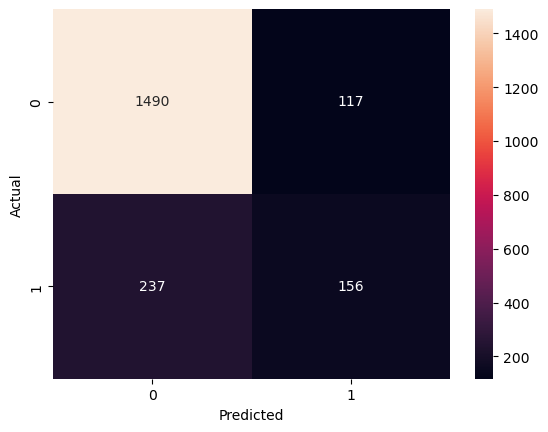

In [21]:
# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

# visualizing confusion matrixmport seaborn as sns
import seaborn as sns
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [22]:
# Print classification report
class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.93      0.89      1607
           1       0.57      0.40      0.47       393

    accuracy                           0.82      2000
   macro avg       0.72      0.66      0.68      2000
weighted avg       0.81      0.82      0.81      2000

